[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/csabiu/WOC/blob/main/nb/tutorial.ipynb)

In [1]:
from pywoc import woc
from astropy.io import fits
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from mpl_toolkits.axes_grid1 import make_axes_locatable



# Generate some 2-D gaussian distributions

[42.76826499 56.58020557 70.39214616 84.20408674]


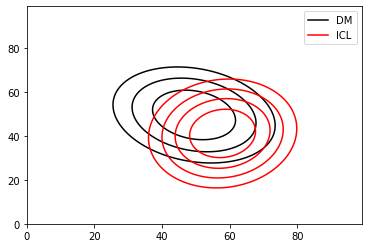

In [2]:
x,y=np.random.multivariate_normal((500,500), ((8600,-10200),(4000,6600)), 200000,check_valid='ignore').T

a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

dm_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
levels=np.linspace(2*np.std(dm_model),np.max(dm_model),4)
print(levels)

plt.contour(dm_model,levels=levels, colors='black')
plt.plot([0,0],[0,0],'k-',label='DM')

x,y=np.random.multivariate_normal((450,550), ((8600,-1200),(4000,6600)), 200000,check_valid='ignore').T
a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

icl_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
plt.contour(icl_model,levels=levels, colors='red')
plt.plot([0,0],[0,0],'r-',label='ICL')
plt.legend()
plt.show()
plt.close()


computing centre [50 49]
Area at radius of 10 = 324.0
overlap area at radius of 10 = 103.0
Enclosed mass1 fraction at radius of 10 = 0.12995798517283016
Enclosed mass2 fraction at radius of 10 = 0.15179652601495597
Area at radius of 20 = 1286.0
overlap area at radius of 20 = 812.0
Enclosed mass1 fraction at radius of 20 = 0.4259954806596407
Enclosed mass2 fraction at radius of 20 = 0.4821030218007891
Area at radius of 30 = 2897.0
overlap area at radius of 30 = 2155.0
Enclosed mass1 fraction at radius of 30 = 0.718119050985073
Enclosed mass2 fraction at radius of 30 = 0.7791582310703631


/home/csabiu/.conda/envs/woc/lib/python3.9/site-packages/pywoc-0.2.0-py3.9.egg/pywoc/woc.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


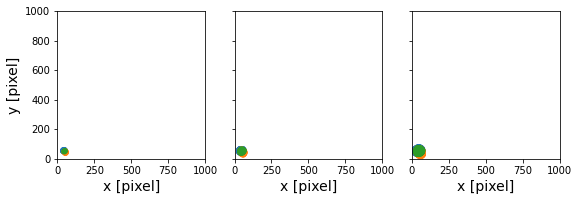

woc: 0.32691441565256646


0.32691441565256646

In [6]:
woc(dm_model,icl_model,[10,20,30],plot=True)

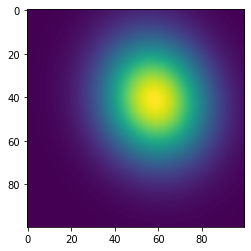

In [9]:
plt.imshow(icl_model)